# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({"Age": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],"Tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

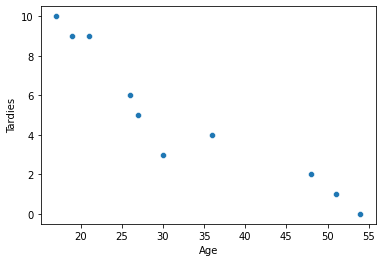

In [3]:
sns.scatterplot(x = student_data["Age"], y = student_data["Tardies"])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- The older the student, the less it tends to arrive late to the class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [5]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(
    X=student_data.Age.to_frame(),
    y=student_data.Tardies
)
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [9]:
beta_0, beta_1

(12.888803363135771, -0.2428207709159809)

Plot your regression model on your scatter plot.

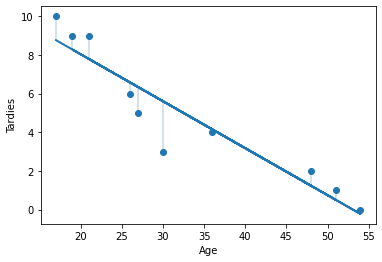

In [36]:
X = student_data.Age
y = student_data.Tardies
y_hat = beta_0 + beta_1 * X # regression line1
plt.scatter(X, y) # pintar los puntos
plt.plot(X, y_hat, lw=2)  # pintamos la línea de regresión
plt.vlines(X, y_hat, y, lw=0.4) # pintamos las líneas que van desde los puntos a la línea
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

In [81]:
sns.set_context('poster')
sns.set(rc={'figure.figsize': (14., 7.)})
sns.set_style('whitegrid')

/home/pablofdezc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='invite', ylabel='attend'>

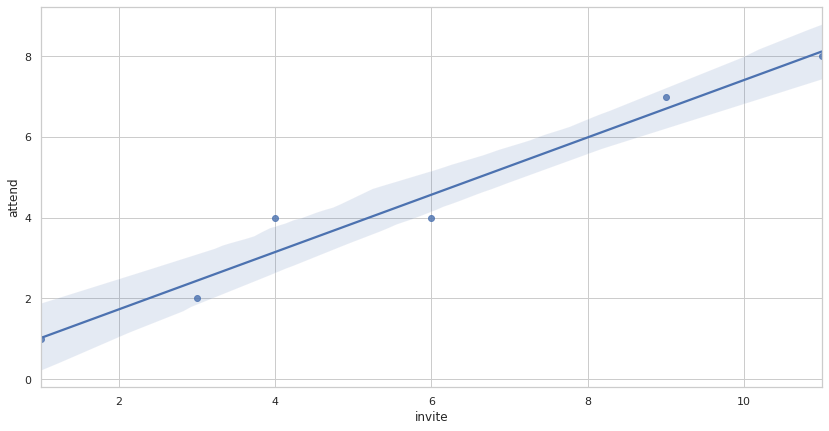

In [82]:
sns.regplot(X,y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

- We can observe that there is a negative correlation between age/tardies. The older your are, you tend to arrive earlier, and the younger you are, you tend to arrive later. However, since the sample is small, we can't generalise for all cases.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [13]:
vehicles = vehicles.drop(["Model","Engine Displacement","Transmission","Drivetrain","Vehicle Class","Fuel Type","City MPG","Highway MPG"], axis=1)
vehicles.head()

,Make,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,1984,4.0,19.388824,17,522.764706,1950
1,AM General,1984,6.0,25.354615,13,683.615385,2550
2,AM General,1985,4.0,20.600625,16,555.437500,2100
3,AM General,1985,6.0,25.354615,13,683.615385,2550
4,ASC Incorporated,1987,6.0,20.600625,16,555.437500,2550


In [14]:
vehicles.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


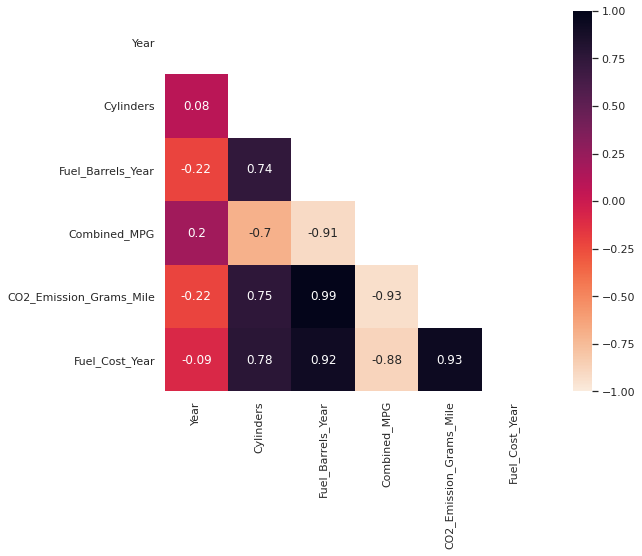

In [60]:
correlation_matrix = vehicles.corr().round(2)
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(data=correlation_matrix_2, mask=mask, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='rocket_r')

Taking into account "CO2 Emission Grams/Mile", we can observe that:

- There is a direct and dependent correlation with "Fuel Barrels/Year" and "Fuel Cost/Year"
- "Cylinders" doesn't have a very strong relation
- There is a negative and dependent correlation between with "Combined MPG"

Which variable do you think will be the most important in determining CO2 emissions? 
- Fuel Barrels/Year (0.99)

Which provides the least amount of helpful information for determining CO2 emissions? 
- Year (-0.22)

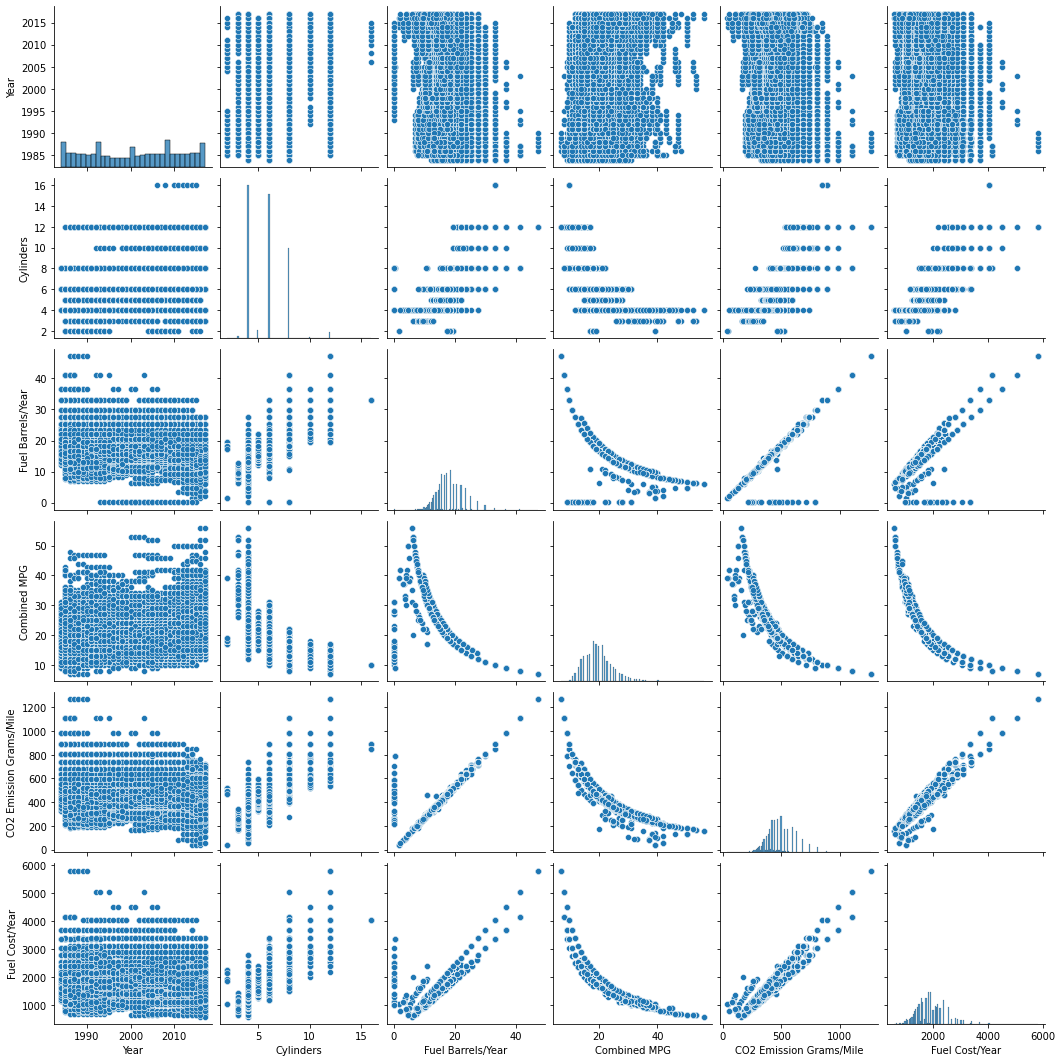

In [16]:
sns.pairplot(vehicles)

In [17]:
vehicles.columns = vehicles.columns.str.replace(" ", "_").str.replace("/", "_")
vehicles.head()

,Make,Year,Cylinders,Fuel_Barrels_Year,Combined_MPG,CO2_Emission_Grams_Mile,Fuel_Cost_Year
0,AM General,1984,4.0,19.388824,17,522.764706,1950
1,AM General,1984,6.0,25.354615,13,683.615385,2550
2,AM General,1985,4.0,20.600625,16,555.437500,2100
3,AM General,1985,6.0,25.354615,13,683.615385,2550
4,ASC Incorporated,1987,6.0,20.600625,16,555.437500,2550


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [61]:
# CO2 Emission Grams/Mile ~ Fuel Barrels/Year
results = smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year", data=vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                             16:47:55   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_Barrels_Year    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# CO2 Emission Grams/Mile ~ Fuel Cost/Year
results2 = smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Cost_Year", data=vehicles).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.867
Model:                                 OLS   Adj. R-squared:                  0.867
Method:                      Least Squares   F-statistic:                 2.334e+05
Date:                     Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                             16:48:23   Log-Likelihood:            -1.8665e+05
No. Observations:                    35952   AIC:                         3.733e+05
Df Residuals:                        35950   BIC:                         3.733e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         61.5631      0.887     69.430      0.000      59.825      63.301
Fuel_Cost_Year     0.2186      0.000    483.072      0.000       0.218       0.220
==============================================================================
Omnibus:                     1566.464   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.699
Skew:                          -0.399   Prob(JB):                    3.65e-288
Kurtosis:                       2.502   Cond. No.                     7.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
# CO2 Emission Grams/Mile ~ Combined_MPG
results3 = smf.ols("CO2_Emission_Grams_Mile ~ Combined_MPG", data=vehicles).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.858
Method:                      Least Squares   F-statistic:                 2.170e+05
Date:                     Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                             16:48:47   Log-Likelihood:            -1.8778e+05
No. Observations:                    35952   AIC:                         3.756e+05
Df Residuals:                        35950   BIC:                         3.756e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      905.2031      0.953    950.221      0.000     903.336     907.070
Combined_MPG   -21.5706      0.046   -465.877      0.000     -21.661     -21.480
==============================================================================
Omnibus:                    23856.426   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380865.584
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      17.770   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# CO2 Emission Grams/Mile ~ Cylinders
results4 = smf.ols("CO2_Emission_Grams_Mile ~ Cylinders", data=vehicles).fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.566
Model:                                 OLS   Adj. R-squared:                  0.566
Method:                      Least Squares   F-statistic:                 4.690e+04
Date:                     Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                             16:50:53   Log-Likelihood:            -2.0784e+05
No. Observations:                    35952   AIC:                         4.157e+05
Df Residuals:                        35950   BIC:                         4.157e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.0946      1.420    127.520      0.000     178.311     183.878
Cylinders     51.0352      0.236    216.569      0.000      50.573      51.497
==============================================================================
Omnibus:                     4434.518   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11452.248
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.382   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# CO2 Emission Grams - Year
results5 = smf.ols("CO2_Emission_Grams_Mile ~ Year", data=vehicles).fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.049
Model:                                 OLS   Adj. R-squared:                  0.049
Method:                      Least Squares   F-statistic:                     1869.
Date:                     Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                             16:53:39   Log-Likelihood:            -2.2194e+05
No. Observations:                    35952   AIC:                         4.439e+05
Df Residuals:                        35950   BIC:                         4.439e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5725.8633    121.455     47.144      0.000    5487.807    5963.920
Year          -2.6243      0.061    -43.231      0.000      -2.743      -2.505
==============================================================================
Omnibus:                     3079.952   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4482.385
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.053   Cond. No.                     3.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- CO2 Emission Grams/Mile ~ Fuel Barrels/Year => R-squared: 0.973
- CO2 Emission Grams/Mile ~ Fuel Cost/Year => R-squared: 0.867
- CO2 Emission Grams/Mile ~ Combined_MPG => R-squared: 0.858
- CO2 Emission Grams/Mile ~ Cylinders => R-squared: 0.566
- CO2 Emission Grams - Year => R-squared: 0.049

In [66]:
results6 = smf.ols("CO2_Emission_Grams_Mile ~ Fuel_Barrels_Year + Fuel_Cost_Year + Combined_MPG" ,
                   data=vehicles).fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                             16:54:53   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           131.6742      1.691     77.861      0.000     128.359     134.989
Fuel_Barrels_Year    19.6955      0.059    331.484      0.000      19.579      19.812
Fuel_Cost_Year        0.0317      0.000     70.466      0.000       0.031       0.033
Combined_MPG         -3.1661      0.043    -73.626      0.000      -3.250      -3.082
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.132
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The most significant variable is "Fuel_Barrels_Year (0.973)" and the least significant is "Year (0.049)". If we add "Fuel_Cost_Year" and "Combined_MPG" to "Fuel_Barrels_Year", the R-squared increases to a new value of 0.98 (+0.007).


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

/home/pablofdezc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Barrels_Year', ylabel='CO2_Emission_Grams_Mile'>

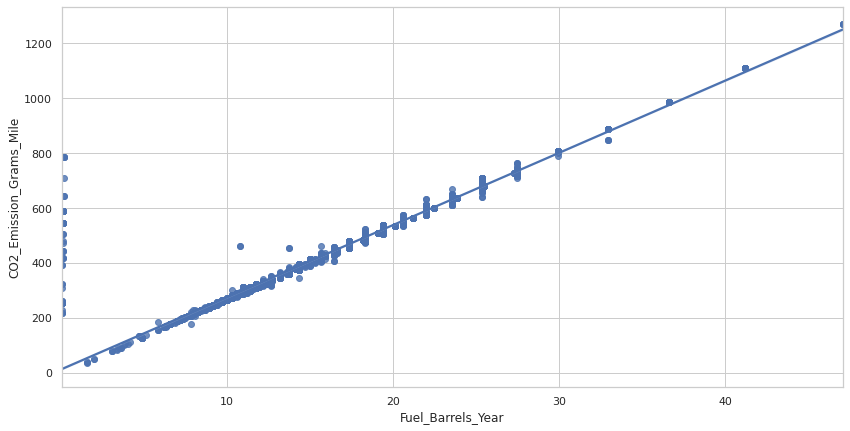

In [84]:
# Taking into account the most significant variable, Fuel_Barrels_year, we can define the following function:

# C02 = 19.6955 * "Fuel_Barrels_Year" + 131.6742

X1  = vehicles["Fuel_Barrels_Year"]
y1 = vehicles["CO2_Emission_Grams_Mile"]

sns.regplot(X1,y1)

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [29]:
party = pd.DataFrame({'invite': [1, 3, 4, 6, 8, 9, 11, 14],
                         'attend': [1, 2, 4, 4, 5, 7, 8, 13],
                            })
party

,invite,attend
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='invite', ylabel='attend'>

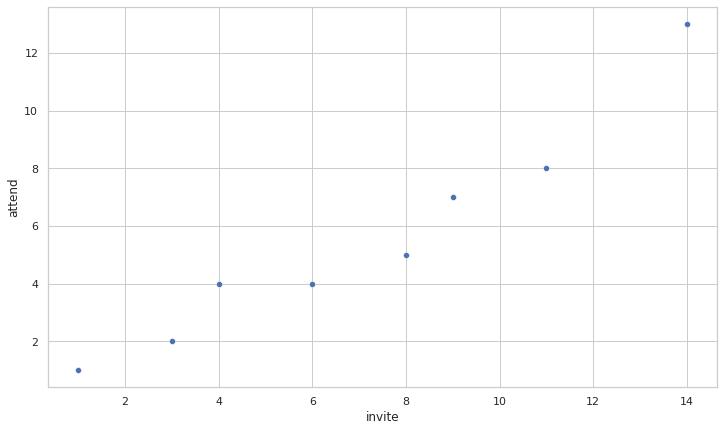

In [69]:
sns.scatterplot(x = party["invite"], y = party["attend"])

/home/pablofdezc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='invite', ylabel='attend'>

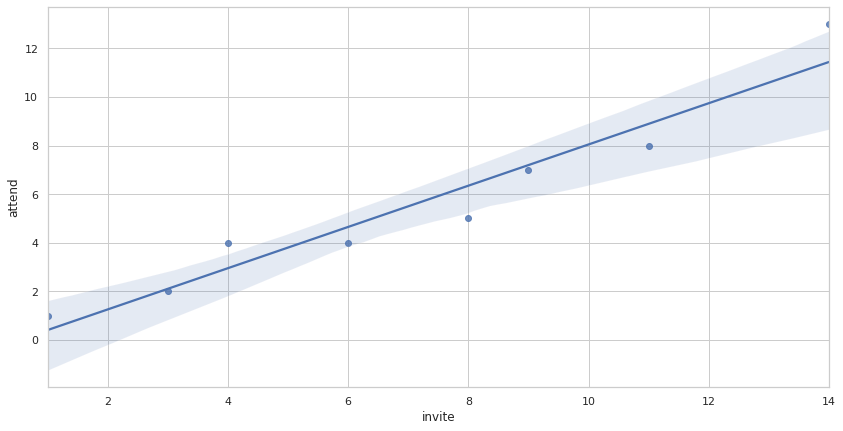

In [83]:
X = party.invite
y = party.attend

sns.regplot(X,y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

- The relationship tells us that the more parties you throw, the more people go to the party. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

/home/pablofdezc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='invite', ylabel='attend'>

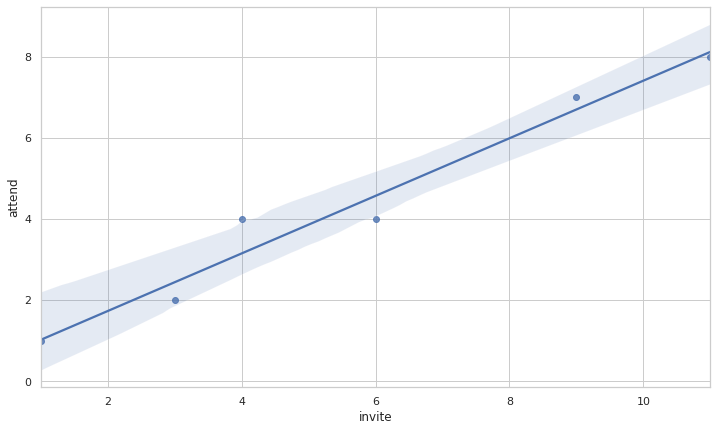

In [72]:
# The problematic point wuld be "invite 14 : attend 13" and "invite 8 : attend 5".

party2 = pd.DataFrame({'invite': [1, 3, 4, 6, 9, 11],
                         'attend': [1, 2, 4, 4, 7, 8],
                            })
party2
X = party2.invite
y = party2.attend
sns.regplot(X,y)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

/home/pablofdezc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/pablofdezc/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='invite', ylabel='attend'>

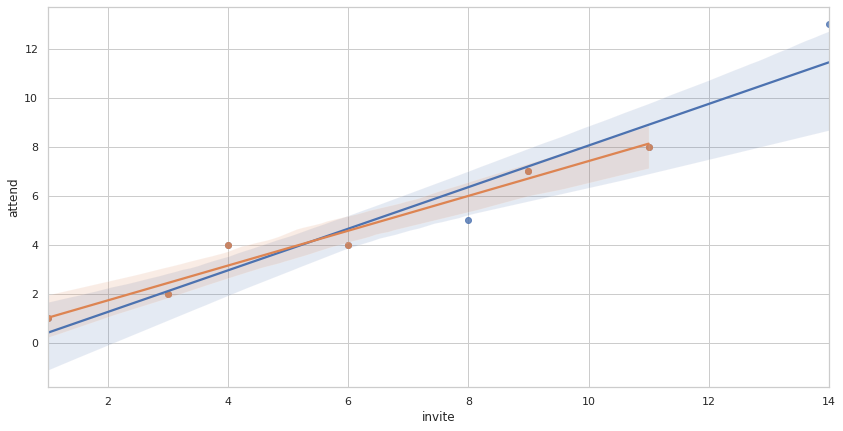

In [78]:
X =party2.invite
y = party2.attend
X1 = party.invite
y1 = party.attend
sns.regplot(X1,y1)
sns.regplot(X,y)
